In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

In [5]:
df = pd.read_csv(url , sep="\t")
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv" , delimiter = '\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [8]:
print('Chipotle Data - rows:' , df.shape[0],'columns:', df.shape[1])

Chipotle Data - rows: 4622 columns: 5


In [9]:
# check the info. # we have null values on choice_description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [10]:
# Checking if there are null values in the data
df.isnull().any().any()

True

In [11]:
# Checking where the nullvalues are in the data
# Observation - there are 1246 null values in the choice column
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [12]:
missingInfo = list(df.columns[df.isnull().any()])

In [13]:
for col in missingInfo:
    missingNumber = df[df[col].isnull() == True].shape[0]
    print('Missing Number for Col {}: {}'.format(col , missingNumber))

Missing Number for Col choice_description: 1246


In [14]:
# Check the columns to understand the data
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

# 1. Which was the most ordered item? and How many items were ordered?

In [18]:
# Observation - we can see the top 5 ordered items    
df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)    

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

# Answer = Most ordered item is Chicken Bowl and 761 items were ordered

# Plot the above to view visualization

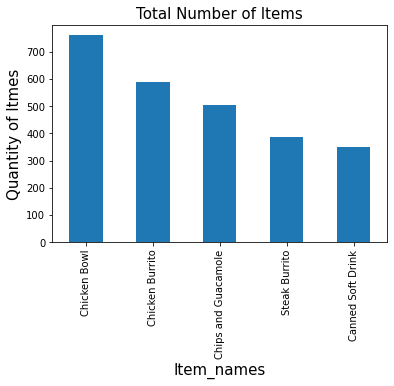

In [19]:
df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel('Item_names' , fontsize = 15)
plt.ylabel('Quantity of Itmes' , fontsize = 15)
plt.title("Total Number of Items" , fontsize = 15)
plt.show()

152. __Drop__ the columns __displacement__ and __acceleration__ and create the following __pairplot__ (sns.pairplot) for cars (kind = scatter)! 

# # 2. What was the most ordered item in the choice_description column?

In [20]:
df.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).head(5)

choice_description
[Diet Coke]                                                               159
[Coke]                                                                    143
[Sprite]                                                                   89
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]     49
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]              42
Name: quantity, dtype: int64

# Plot the viz for the above

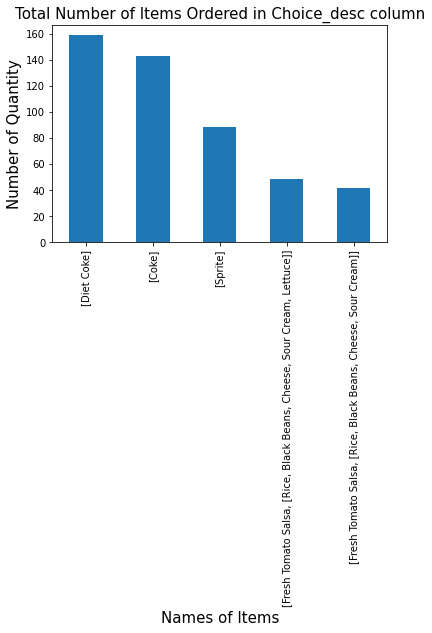

In [21]:
df.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel('Names of Items' , fontsize = 15)
plt.ylabel('Number of Quantity' , fontsize = 15)
plt.title("Total Number of Items Ordered in Choice_desc column" , fontsize = 15)
plt.show()

# 3 Turn the item price into a float

In [22]:
# making a copy of the dataframe
df1 = df.copy()

In [23]:
# we can see its an object so we need to change it into a float integer
df.item_price.dtype

dtype('O')

In [24]:
df["item_price"]

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [75]:
df1['item_price'] = df1['item_price'].apply(lambda x : float(x[1:-1]))

In [76]:
df1.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

# The above can be done this way

In [29]:
new = [x.replace("$"," ") for x in df1["item_price"]]
df1["item_price"] = new

In [30]:
df1.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [43]:
# you can see that its been changed from an object to integer and we stripped the dollar sign as well 
df1.item_price.dtype

dtype('float64')

In [45]:
# Check results
df1.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


# How much was the revenue for the period in the dataset?

In [39]:
# Here we multiply the price of the items by the quantity ordered
df1['revenue'] = df1['item_price'] * df1['quantity']

In [40]:
# Check results
df1.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98 16.98


In [51]:
# or
print('Revenue was: $' + str(np.round(df1['revenue'].sum(),2)))

Revenue was: $39237.02


# print a data frame with only two columns item_name and item_price

In [92]:
# delete the duplicates in item_name and quantity
filtered = df1.drop_duplicates(['item_name','quantity']) # select only the products with quantity equals to 1
one_prod = filtered[filtered.quantity == 1]
# select only the item_name and item_price columns
price_per_item = one_prod[['item_name', 'item_price']]
# sort the values from the most to less expensive
price_per_item.sort_values(by = "item_price", ascending = False)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


# What was the quantity of the most expensive item ordered?

In [97]:
df1.sort_values(by = 'item_price' , ascending=False).head(1)

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75


# How many times were a Veggie Salad Bowl ordered?

In [110]:
# here we want all instances where item name has veggie salad bowl
df1[df1['item_name'] == 'Veggie Salad Bowl']

,order_id,quantity,item_name,choice_description,item_price,revenue
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25,11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25,11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75,8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25,11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75,8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75,8.75


# The above can also be done this way

In [42]:
df1.loc[(df1['item_name'] == 'Veggie Salad Bowl')]

,order_id,quantity,item_name,choice_description,item_price,revenue
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25,11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25,11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75,8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25,11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75,8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75,8.75


# Part 2 - Beer Drinking

In [55]:
url = 'https://raw.githubusercontent.com/alcor2019/justmarkham/master/data/drinks.csv'

In [56]:
data = pd.read_csv(url)
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [49]:
# new_col = [col.capitalize()  for col in data.columns]
# data.columns = new_col

In [57]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [51]:
data.shape

(4622, 6)

# Which continent drinks more beer on average?

In [58]:
# I rearranged the answer so we can see the top average beer serving continents.
data.groupby('continent')['beer_servings'].mean().sort_values(ascending = False).round(2)

continent
Europe           193.78
South America    175.08
North America    145.43
Oceania           89.69
Africa            61.47
Asia              37.05
Name: beer_servings, dtype: float64

# Visualization for the above

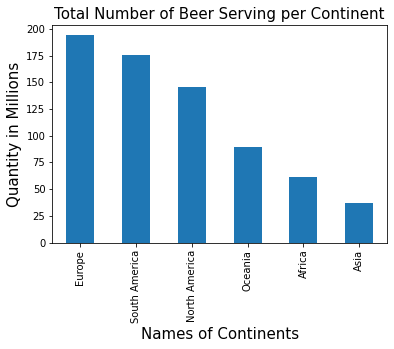

In [130]:
data.groupby('continent')['beer_servings'].mean().sort_values(ascending = False).round(2).plot(kind='bar')
plt.xlabel('Names of Continents' , fontsize = 15)
plt.ylabel('Quantity in Millions' , fontsize = 15)
plt.title("Total Number of Beer Serving per Continent" , fontsize = 15)
plt.show()


# For each continent print the statistics for Wine consumption.

In [127]:
# We can see the descriptive stats if the whole dataframe this way
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [126]:
# Final output
data.groupby('continent')['wine_servings'].describe()    

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
Asia,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
Europe,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
North America,23.0,24.521739,28.266378,1.0,5.0,11.0,34.00,100.0
Oceania,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
South America,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


# Plot the above

# Part 3 US Crime data 

In [61]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv'

In [62]:
crime = pd.read_csv(url)
crime.head()


,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


# What is the data type of the columns?

In [63]:
crime.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

# Convert the type of the column Year to datetime64

In [206]:
# first we check the data tyoe of year and we can as above its an interger
crime.Year.dtype

dtype('int64')

In [207]:
# Simple way to convert Year into datetime object
# crime.Year = pd.to_datetime(crime.Year , format = '%Y/%m/%d') be careful when u use this format
crime.Year = pd.to_datetime(crime.Year , format = '%Y')


In [208]:
# Check results
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                55 non-null     datetime64[ns]
 1   Population          55 non-null     int64         
 2   Total               55 non-null     int64         
 3   Violent             55 non-null     int64         
 4   Property            55 non-null     int64         
 5   Murder              55 non-null     int64         
 6   Forcible_Rape       55 non-null     int64         
 7   Robbery             55 non-null     int64         
 8   Aggravated_assault  55 non-null     int64         
 9   Burglary            55 non-null     int64         
 10  Larceny_Theft       55 non-null     int64         
 11  Vehicle_Theft       55 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


In [173]:
# Check results
crime['Year'].head()

0   1960-01-01
1   1961-01-01
2   1962-01-01
3   1963-01-01
4   1964-01-01
Name: Year, dtype: datetime64[ns]

# Set the Year column as the index of the dataframe

In [ ]:
crime = crime.set_index('Year')

# Delete the Total column

In [210]:
# check columns before deleting it
crime.columns

Index(['Population', 'Total', 'Violent', 'Property', 'Murder', 'Forcible_Rape',
       'Robbery', 'Aggravated_assault', 'Burglary', 'Larceny_Theft',
       'Vehicle_Theft'],
      dtype='object')

In [211]:
del crime['Total']

In [212]:
# Check results
crime.columns

Index(['Population', 'Violent', 'Property', 'Murder', 'Forcible_Rape',
       'Robbery', 'Aggravated_assault', 'Burglary', 'Larceny_Theft',
       'Vehicle_Theft'],
      dtype='object')

In [222]:
crimes = crime.copy()

# Group the year by decades and sum the values

In [223]:
# Uses resample to sum each decade
decade_crimes = crime.resample('10AS').sum()

# Uses resample to get the max value only for the "Population" column
population = crime['Population'].resample('10AS').max() # Updating the "Population" column

# Uses resample to get the max value only for the "Population" column
decade_crimes['Population'] = population

# Updating the "Population" column
decade_crimes

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


# What is the most dangerous decade to live in the US?

In [224]:
crimes.idxmax()

Population           2010-01-01
Violent              1990-01-01
Property             1990-01-01
Murder               1990-01-01
Forcible_Rape        1990-01-01
Robbery              1990-01-01
Aggravated_assault   1990-01-01
Burglary             1980-01-01
Larceny_Theft        1990-01-01
Vehicle_Theft        1990-01-01
dtype: datetime64[ns]

# Return the first 3 rows of the DataFrame df.

In [227]:
crime.iloc[:3]

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800


# Select just the 'Murder' and 'Robbery' columns from the DataFrame df and print results

In [236]:
crime.loc[:, ['Murder', 'Robbery']].head()

,Murder,Robbery
Year,,
1960-01-01,9110,107840
1961-01-01,8740,106670
1962-01-01,8530,110860
1963-01-01,8640,116470
1964-01-01,9360,130390


# Another way of doing the above 

In [240]:
df_new = crime[['Murder' , 'Robbery']]
df_new.head()

,Murder,Robbery
Year,,
1960-01-01,9110,107840
1961-01-01,8740,106670
1962-01-01,8530,110860
1963-01-01,8640,116470
1964-01-01,9360,130390


# Select the data in rows [3, 4, 8] and in columns ['Murder', 'Robbery']

In [242]:
crime.loc[crime.index[[3,4,8]] , ['Murder' , 'Robbery']]

,Murder,Robbery
Year,,
1963-01-01,8640,116470
1964-01-01,9360,130390
1968-01-01,13800,262840


# Select only the rows where the number of murder is greater than 24,000

In [243]:
crime[crime['Murder'] > 24000]

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1991-01-01,252177000,1911770,12961100,24700,106590,687730,1092740,3157200,8142200,1661700
1993-01-01,257908000,1926020,12218800,24530,106010,659870,1135610,2834800,7820900,1563100


In [235]:
# Or
df_new['Murder'][df_new['Murder'] > 24000 ]

Year
1991-01-01    24700
1993-01-01    24530
Name: Murder, dtype: int64

# Select the rows the murder is between 20k and 24k (inclusive)

In [251]:
crime[crime['Murder'].between(20000,24000)]

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1974-01-01,211392000,974720,9278700,20710,55400,442400,456210,3039200,5262500,977100
1975-01-01,213124000,1039710,10252700,20510,56090,470500,492620,3265300,5977700,1009600
1979-01-01,220099000,1208030,11041500,21460,76390,480700,629480,3327700,6601000,1112800
1980-01-01,225349264,1344520,12063700,23040,82990,565840,672650,3795200,7136900,1131700
1981-01-01,229146000,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
1982-01-01,231534000,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400
1986-01-01,240132887,1489169,11722700,20613,91459,542775,834322,3241410,7257153,1224137
1987-01-01,242282918,1483999,12024700,20096,91110,517704,855088,3236184,7499900,1288674
1988-01-01,245807000,1566220,12356900,20680,92490,542970,910090,3218100,7705900,1432900


# Calculate the mean murder for each different year in df.

In [255]:
crime.groupby('Year')['Murder'].mean()

Year
1960-01-01     9110
1961-01-01     8740
1962-01-01     8530
1963-01-01     8640
1964-01-01     9360
1965-01-01     9960
1966-01-01    11040
1967-01-01    12240
1968-01-01    13800
1969-01-01    14760
1970-01-01    16000
1971-01-01    17780
1972-01-01    18670
1973-01-01    19640
1974-01-01    20710
1975-01-01    20510
1976-01-01    18780
1977-01-01    19120
1978-01-01    19560
1979-01-01    21460
1980-01-01    23040
1981-01-01    22520
1982-01-01    21010
1983-01-01    19310
1984-01-01    18690
1985-01-01    18980
1986-01-01    20613
1987-01-01    20096
1988-01-01    20680
1989-01-01    21500
1990-01-01    23440
1991-01-01    24700
1992-01-01    23760
1993-01-01    24530
1994-01-01    23330
1995-01-01    21610
1996-01-01    19650
1997-01-01    18208
1998-01-01    16914
1999-01-01    15522
2000-01-01    15586
2001-01-01    16037
2002-01-01    16229
2003-01-01    16528
2004-01-01    16148
2005-01-01    16740
2006-01-01    17030
2007-01-01    16929
2008-01-01    16442
2009-01-01    1

# Rearranging the Murder each year depending on the highest mean

In [256]:
crime.groupby('Year')['Murder'].mean().sort_values(ascending=False)

Year
1991-01-01    24700
1993-01-01    24530
1992-01-01    23760
1990-01-01    23440
1994-01-01    23330
1980-01-01    23040
1981-01-01    22520
1995-01-01    21610
1989-01-01    21500
1979-01-01    21460
1982-01-01    21010
1974-01-01    20710
1988-01-01    20680
1986-01-01    20613
1975-01-01    20510
1987-01-01    20096
1996-01-01    19650
1973-01-01    19640
1978-01-01    19560
1983-01-01    19310
1977-01-01    19120
1985-01-01    18980
1976-01-01    18780
1984-01-01    18690
1972-01-01    18670
1997-01-01    18208
1971-01-01    17780
2006-01-01    17030
2007-01-01    16929
1998-01-01    16914
2005-01-01    16740
2003-01-01    16528
2008-01-01    16442
2002-01-01    16229
2004-01-01    16148
2001-01-01    16037
1970-01-01    16000
2000-01-01    15586
1999-01-01    15522
2009-01-01    15399
2012-01-01    14866
2010-01-01    14772
1969-01-01    14760
2011-01-01    14661
2013-01-01    14319
2014-01-01    14249
1968-01-01    13800
1967-01-01    12240
1966-01-01    11040
1965-01-01     

# Sort df first by the values in the 'Murder' in decending order, #then by the value in the 'Violent' column in ascending order.

In [267]:
crime.sort_values(by = ['Murder' , 'Violent'] , ascending = [False , True])

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1991-01-01,252177000,1911770,12961100,24700,106590,687730,1092740,3157200,8142200,1661700
1993-01-01,257908000,1926020,12218800,24530,106010,659870,1135610,2834800,7820900,1563100
1992-01-01,255082000,1932270,12505900,23760,109060,672480,1126970,2979900,7915200,1610800
1990-01-01,248709873,1820130,12655500,23440,102560,639270,1054860,3073900,7945700,1635900
1994-01-01,260341000,1857670,12131900,23330,102220,618950,1113180,2712800,7879800,1539300
1980-01-01,225349264,1344520,12063700,23040,82990,565840,672650,3795200,7136900,1131700
1981-01-01,229146000,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
1995-01-01,262755000,1798790,12063900,21610,97470,580510,1099210,2593800,7997700,1472400
1989-01-01,248239000,1646040,12605400,21500,94500,578330,951710,3168200,7872400,1564800


In [ ]:
df.sort_values(by=['Murder', 'Violent'], ascending=[False, True])

# Part 3 Cars

In [274]:
cars1 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars1.csv")
cars2 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/05_Merge/Auto_MPG/cars2.csv")

print(cars1.head())
print(cars2.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          8           307        130    3504          12.0     70   
1  15.0          8           350        165    3693          11.5     70   
2  18.0          8           318        150    3436          11.0     70   
3  16.0          8           304        150    3433          12.0     70   
4  17.0          8           302        140    3449          10.5     70   

   origin                        car  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0       1  chevrolet chevelle malibu         NaN          NaN          NaN   
1       1          buick skylark 320         NaN          NaN          NaN   
2       1         plymouth satellite         NaN          NaN          NaN   
3       1              amc rebel sst         NaN          NaN          NaN   
4       1                ford torino         NaN          NaN          NaN   

   Unnamed: 12  Unnamed: 13  
0          NaN          NaN  
1          NaN

# Step 3. Join cars1 and cars2 into a single DataFrame called cars

In [280]:
combined = pd.concat([cars1 , cars2])
combined.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


# Step 4. Oops, it seems our first dataset has some unnamed blank columns, fix columns

In [285]:
cars = combined.loc[:, 'mpg':'car']
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


# Step5. Set Car as index

In [288]:
cars = cars.set_index('car')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
car,,,,,,,,
chevrolet chevelle malibu,18.0,8,307,130,3504,12.0,70,1
buick skylark 320,15.0,8,350,165,3693,11.5,70,1
plymouth satellite,18.0,8,318,150,3436,11.0,70,1
amc rebel sst,16.0,8,304,150,3433,12.0,70,1
ford torino,17.0,8,302,140,3449,10.5,70,1


# Step 6. Oops, there is a column missing, called owners. Create a random number Series from 15,000 to 73,000

In [289]:
nr_owners = np.random.randint(15000, high=73001, size=398, dtype='l')
nr_owners

array([56475, 40424, 52291, 55790, 43712, 63010, 59103, 17846, 16489,
       26626, 28664, 66193, 55963, 72137, 58831, 28425, 20368, 20128,
       27015, 58028, 30986, 34942, 39259, 54570, 49857, 66069, 59479,
       31241, 61069, 19420, 18926, 58522, 29807, 19878, 18444, 34404,
       41798, 71535, 15339, 59907, 31290, 40378, 20214, 27696, 16084,
       31689, 67872, 42355, 24414, 21418, 22628, 47398, 64593, 63242,
       57519, 15619, 41223, 28023, 60564, 24865, 29254, 61563, 23400,
       51244, 48978, 53728, 57077, 26201, 37855, 54692, 41691, 38072,
       27409, 51278, 65315, 45761, 53821, 39703, 53505, 68650, 46441,
       27064, 29551, 44894, 34355, 72513, 55333, 59044, 22639, 66430,
       69607, 46432, 56092, 17020, 24933, 33238, 60288, 15218, 67060,
       58464, 72615, 52030, 65097, 50734, 15478, 44714, 43069, 26203,
       23720, 34893, 40955, 46102, 52439, 51322, 21925, 63266, 25240,
       23122, 51017, 72520, 26891, 56109, 56468, 62664, 27239, 30623,
       26526, 30384,

# Create a column for the owners and attach to the Cars dataframe 

In [290]:
cars['owners'] = nr_owners

In [291]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,owners
car,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307,130,3504,12.0,70,1,56475
buick skylark 320,15.0,8,350,165,3693,11.5,70,1,40424
plymouth satellite,18.0,8,318,150,3436,11.0,70,1,52291
amc rebel sst,16.0,8,304,150,3433,12.0,70,1,55790
ford torino,17.0,8,302,140,3449,10.5,70,1,43712


In [ ]:
df.pivot_table(index='cyl', columns='gear', values='mpg', aggfunc='mean')

In [ ]:
cars.pivot_table(index = 'cylinders' , columns = 'gears' , values = 'mpg' , aggfunc='mean')

In [ ]:
# Animals , Cars , Crime , Names , titanic